## Функции

In [2664]:
# Функция, с помощью которой мы будем в новые столбцы заполнять их значениями
def find_item(cell):
    if item in cell:
        return 1
    return 0

# Загрузка Pandas и очистка данных

In [2665]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2666]:
# фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [2667]:
df = pd.read_csv('main_task.csv')
pd.set_option('display.max_columns', None)
df.head(3)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781


In [2668]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [2669]:
# Проверим данные в колонках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


### Cuisine_Style

Распределение данных по кухням

В первую очередь необходимо заполнить пропуски.
Проверим, что хранится в URL_TA

In [2670]:
df['URL_TA'].value_counts()

/Restaurant_Review-g187514-d1315077-Reviews-El_Pimiento_Verde-Madrid.html                                 2
/Restaurant_Review-g187514-d4600226-Reviews-Cafeteria_Teresa-Madrid.html                                  2
/Restaurant_Review-g187514-d8753348-Reviews-Tropecientos-Madrid.html                                      2
/Restaurant_Review-g187514-d11674463-Reviews-Beerhouse-Madrid.html                                        2
/Restaurant_Review-g187514-d7337366-Reviews-Lady_Madonna-Madrid.html                                      2
                                                                                                         ..
/Restaurant_Review-g188590-d4562372-Reviews-Van_Gogh_Museum_Cafe-Amsterdam_North_Holland_Province.html    1
/Restaurant_Review-g190454-d5981102-Reviews-Trzesniewski-Vienna.html                                      1
/Restaurant_Review-g189852-d11837440-Reviews-Alegria_Tapas_Bar-Stockholm.html                             1
/Restaurant_Review-g187497-d

Похоже, что есть некоторые данные по типу ресторана.
Вытянем эти данные и посмотрим на респределение

In [2671]:
df['URL_TA'] = df['URL_TA'].str.split('-')
df['URL_TA'] = [x[4].lower() for x in df.URL_TA]
df['URL_TA'].value_counts()

mcdonald_s                    116
burger_king                    53
subway                         51
pret_a_manger                  48
kfc                            41
                             ... 
the_loft_bar_and_grill          1
malabida                        1
mejo_de_betto_e_mary            1
byron_putney                    1
konzert_cafe_schwarzenberg      1
Name: URL_TA, Length: 37336, dtype: int64

In [2672]:
df[df['Cuisine Style'].isna()]['URL_TA'].value_counts()

mcdonald_s              69
subway                  37
burger_king             25
eat                     19
pret_a_manger           16
                        ..
the_good_life_eatery     1
el_llagar_de_granda      1
kotyogo                  1
proibido                 1
tibarg_kebap_haus        1
Name: URL_TA, Length: 8890, dtype: int64

Как видно из распределения, наибольшее количество строк с незаполненными значениями кухонь относятся к Fast Food

In [2673]:
# заполним пропуски
df['Cuisine Style'].fillna("['Fast Food']", inplace=True)
df['Cuisine Style'].value_counts()

['Fast Food']                                                                                                   9485
['Italian']                                                                                                     1032
['French']                                                                                                       805
['Spanish']                                                                                                      695
['French', 'European']                                                                                           405
                                                                                                                ... 
['Cafe', 'Soups', 'Delicatessen', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']                   1
['Barbecue', 'Greek', 'Wine Bar', 'Gluten Free Options']                                                           1
['American', 'European', 'Swedish', 'Danish', 'Vegetarian Friend

In [2674]:
# Нам необходимо создать список кухонь
c = Counter()
cuisine_count = 0
for str_val in df['Cuisine Style'].tolist():
    cuisine_lst = str_val[1:-1].split(',')
    cuisine_count += (1 if len(cuisine_lst) == 0 else len(cuisine_lst))
    for cuisine in cuisine_lst:
        if cuisine != '':
            key = cuisine.strip()[1:-1]
            c[key] += 1

print('кухня представлена в наибольшем количестве ресторанов',
      c.most_common(1)[0])
print('среднее количество кухонь предлагается в одном ресторане',
      (cuisine_count / len(df)))

кухня представлена в наибольшем количестве ресторанов ('Vegetarian Friendly', 11189)
среднее количество кухонь предлагается в одном ресторане 2.6224


Выберем 20 наиболее распространненных кухонь, а остальные позже отнесем к редким

In [2675]:
cuisines = c.most_common(20)

Добавляем новые признаки по кухням и вызываем функцию для заполнения значениями

In [2676]:
# сохраним в cuisine_columns название кохонь, которые добавили в колонки
cuisine_columns = []

for item, frequency in cuisines:
    cuisine_columns.append(item)
    df[item] = df['Cuisine Style'].apply(find_item)


Все остальные кухни отнесем к редким и запишем колличество в данном ресторане

In [2677]:
# Составим лист редкий кухонь
all_cuisines = list(c)
most_common = []
for letter, count in cuisines:
    most_common.append(letter)
rare_cuisines = set(all_cuisines) - set(most_common)

In [2678]:
# Количество редких кухонь в ресторане
def cuisine_rare_count(cell):
    x = 0
    for i in rare_cuisines:
        if i in cell:
            x += 1
    return x

cuisine_columns.append('Cuisine Rare')
df['Cuisine Rare'] = df['Cuisine Style'].apply(cuisine_rare_count)

### Price Range

Проверим распределение данных по ценовой категории

In [2679]:
df['Price Range'].value_counts(dropna=False)

$$ - $$$    18412
NaN         13886
$            6279
$$$$         1423
Name: Price Range, dtype: int64

Заполним пропущенные данные модай

In [2680]:
df['Price Range'].fillna(df['Price Range'].mode()[0], inplace=True)
df['Price Range'].value_counts()

$$ - $$$    32298
$            6279
$$$$         1423
Name: Price Range, dtype: int64

Заменим данные ценовых категорий на читабельные и разнесём по дополнителныем признакам

#### Ремарка:
данный способ при проверке не подтвердил свою актуальность и позже будет изменен

In [2681]:
# Заменим данные Price_Range на читабельные
'''
price_dict = {
    "$":'Cheap',
    "$$ - $$$":'Middle',
    "$$$$":'Expensive'
}
df['Price Range'] = df['Price Range'].replace(to_replace=price_dict)
'''

'\nprice_dict = {\n    "$":\'Cheap\',\n    "$$ - $$$":\'Middle\',\n    "$$$$":\'Expensive\'\n}\ndf[\'Price Range\'] = df[\'Price Range\'].replace(to_replace=price_dict)\n'

Добавляем новые признаки ценовых категорий

In [2682]:
'''df = pd.concat([df, pd.get_dummies(df['Price Range'], drop_first=False)], axis=1);'''

"df = pd.concat([df, pd.get_dummies(df['Price Range'], drop_first=False)], axis=1);"

В связи с тем, что распределение ценовых категорий на раздельные признаки не улучшило результат, пробуем отказаться от использования ценовых категорий как категорального признака. 
Закоментируем предыдущий код.
Будем использовать ценовые категории как числовой признак, для чего заменим данные на условный разряд

In [2683]:
price_dict = {
    "$": 1,
    "$$ - $$$": 2,
    "$$$$": 3
}
df['Price Range'] = df['Price Range'].replace(to_replace=price_dict)

Произошло некоторое улучшение МАЕ

### Reviews
Проверим распределение данных по отзывам

In [2684]:
df['Reviews'].sample(5)

18745                                             [[], []]
17440    [['Breakfast pit stop!', 'Local hospitality'],...
7951     [['Good coffee', 'Wonderful coffee shop!'], ['...
19132    [['Cool Mexican', 'Great local restaurant'], [...
16280    [['A gem near the Michel in the "Komponisten.....
Name: Reviews, dtype: object

В отзывах записаны как сами отзывы, так и даты первого и последнего отзыва

Выделим даты в отдельные колонки

In [2685]:
# Задаем паттерн для даты
pattern = re.compile('\'\d+\/\d+\/\d+\'?')
# Записываем даты в список
dates_array = []
cycle = -1
for row in df['Reviews']:
    cycle += 1
    dates_str = pattern.findall(row)
    # Каждый цикл добавлям новый массив
    dates_array.append([])
    # Проходим по датам в строке
    for i in range(len(dates_str)):
        str_date = dates_str[i][1:-1]
        if str_date == '':
            continue

        # Переводим строковую дату в datetime
        the_date = datetime.strptime(str_date, '%m/%d/%Y')
        # Добавляем дату в список по индексу
        dates_array[cycle].append(the_date)

In [2686]:
# Добавляем даты из списка в DataFrame
df2 = pd.DataFrame(dates_array, columns=['Last_Review', 'First_Review'])
df = pd.concat([df, df2.reindex(df.index)], axis=1)

In [2687]:
df[['Last_Review', 'First_Review', 'Number of Reviews']].sample(5)

,Last_Review,First_Review,Number of Reviews
22343,NaT,NaT,NaN
7371,2016-02-17,2015-06-18,17.0
37331,2017-09-22,NaT,7.0
20637,2017-09-25,2017-08-15,91.0
12191,2018-01-03,2017-10-21,463.0


Заполняем пустые значения последней датой отзыва

In [2688]:
last_date = df['Last_Review'].max()
values = {'Last_Review': last_date, 'First_Review': last_date}
df.fillna(value=values, inplace=True)

Добавим новый признак - количесво дней между отзывами

In [2689]:
df['Days_Between_Reviews'] = (df['Last_Review'] - df['First_Review']).dt.days

Проверим распределение

count    40000.000000
mean        16.339600
std        369.213643
min      -5059.000000
25%          0.000000
50%         20.000000
75%        105.000000
max       3207.000000
Name: Days_Between_Reviews, dtype: float64

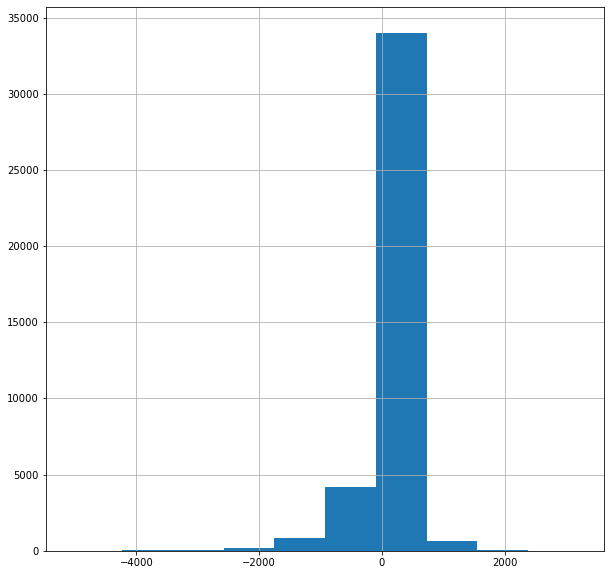

In [2690]:
df['Days_Between_Reviews'].hist()
df['Days_Between_Reviews'].describe()

Видны отрицательны значения. Это значит, что в ряде строк дата последнего и первого отзыва поменялись местами. 
Повторно расчитаем колличество дней с абсолютным значением.

In [2691]:
df['Days_Between_Reviews'] = abs(
    (df['Last_Review'] - df['First_Review']).dt.days)

count    40000.000000
mean       176.186250
std        324.874334
min          0.000000
25%          7.000000
50%         58.000000
75%        192.000000
max       5059.000000
Name: Days_Between_Reviews, dtype: float64

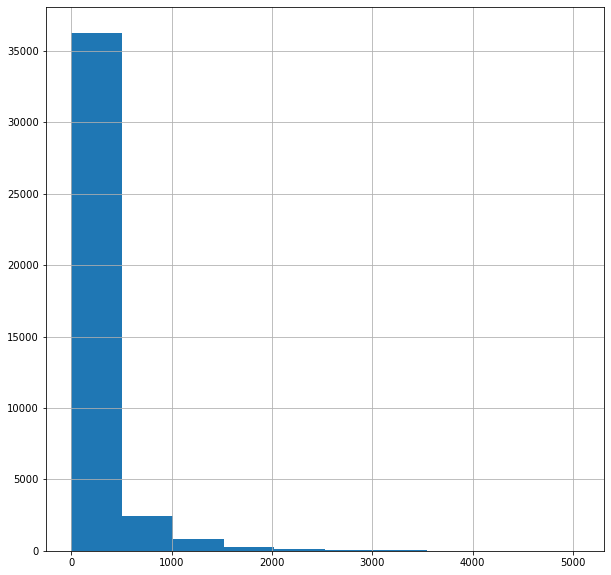

In [2692]:
df['Days_Between_Reviews'].hist()
df['Days_Between_Reviews'].describe()

Видно, что подавляющее количество дней между отзывами лежит в промежутке 0 - 1000. Остальные значения можно считать выбросами.
Отфильтруем выбросы с помощью интерквартильного расстояния

In [2693]:
median = df['Days_Between_Reviews'].median()
IQR = df['Days_Between_Reviews'].quantile(
    0.75) - df['Days_Between_Reviews'].quantile(0.25)
perc25 = df['Days_Between_Reviews'].quantile(0.25)
perc75 = df['Days_Between_Reviews'].quantile(0.75)

df['Days_Between_Reviews'] = df['Days_Between_Reviews'][df['Days_Between_Reviews'].between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Заполним среднее количество дней в отсутствующие данные

In [2694]:
mean_abs = round(df['Days_Between_Reviews'].mean(), 0)
df['Days_Between_Reviews'] = df['Days_Between_Reviews'].fillna(mean_abs)

count    40000.000000
mean        87.976850
std        102.666346
min          0.000000
25%          7.000000
50%         58.000000
75%        118.000000
max        469.000000
Name: Days_Between_Reviews, dtype: float64

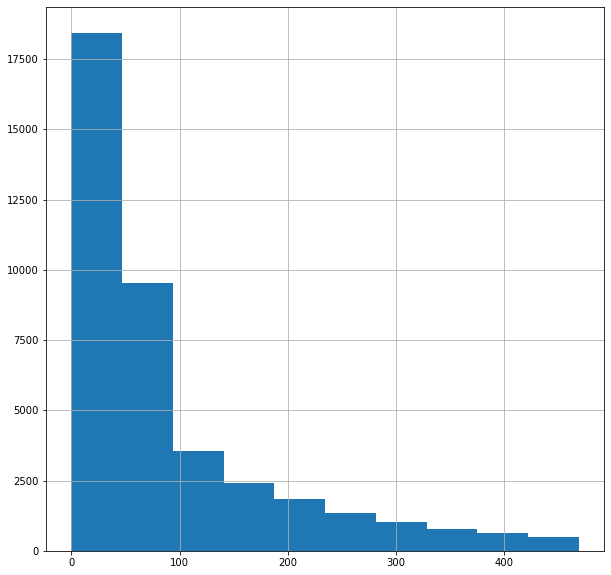

In [2695]:
df['Days_Between_Reviews'].hist()
df['Days_Between_Reviews'].describe()

Данные распределены нормально

Добавляем признаки - количество положительных и отрицательных отзывов

In [2696]:
positive_pattern = 'Good|Unique|Delicious|Best|Amazing|Nice|Better|Excellent|Clean|Great|Healthy|Lovely\
|Traditional|Brilliant|Fresh|Top|Perfect|enjoy|not miss|Awesome|Beautiful|Cosy\
|Tasty|Fabulous|Cheap|Friend|Family|Interesting|Wonderful|Ideal|Fantastic|Love|Delightful'

negative_pattern = 'Underground|Wasting|Bad|Boring|Shameful|Poor|Nothing|Terrible|Expensive|Not recommend\
|Disappointing|Lack|Nothing'

df['Positive_Revies'] = df['Reviews'].str.count(
    positive_pattern, flags=re.IGNORECASE)
df['Negative_Revies'] = df['Reviews'].str.count(
    negative_pattern, flags=re.IGNORECASE)

### Number of Reviews

Проверим распределение признака

count    37457.000000
mean       124.825480
std        295.666352
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Number of Reviews, dtype: float64

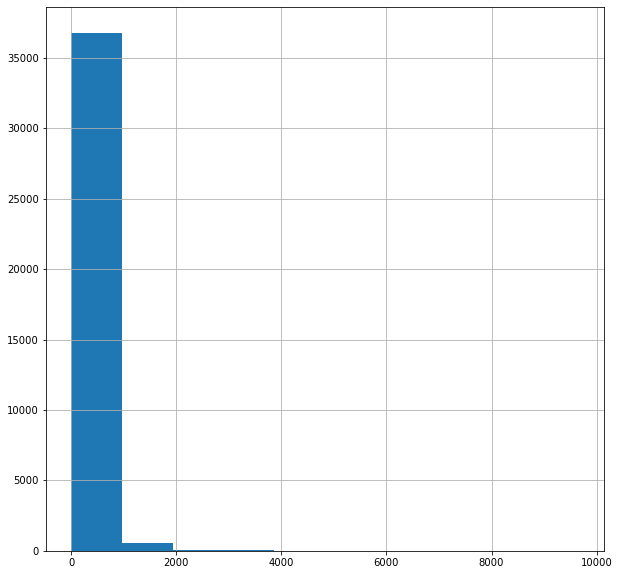

In [2697]:
df['Number of Reviews'].hist()
df['Number of Reviews'].describe()

Видно, что подавляющее количество отзывов лежит в промежутке 0 - 1000. Остальные значения можно считать выбросами.
Отфильтруем выбросы с помощью интерквартильного расстояния.

In [2698]:
median = df['Number of Reviews'].median()
IQR = df['Number of Reviews'].quantile(0.75) - df['Number of Reviews'].quantile(0.25)
perc25 = df['Number of Reviews'].quantile(0.25)
perc75 = df['Number of Reviews'].quantile(0.75)

df['Number of Reviews'] = df['Number of Reviews'][df['Number of Reviews'].between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

Заполним пропуски в данных средним значением переменной

In [2699]:
mean_abs = round(df['Number of Reviews'].mean(), 0)
df['Number of Reviews'].fillna(mean_abs, inplace=True)

Еще раз проверим распределение признака

count    40000.000000
mean        51.907175
std         56.733789
min          2.000000
25%         10.000000
50%         38.000000
75%         58.000000
max        274.000000
Name: Number of Reviews, dtype: float64

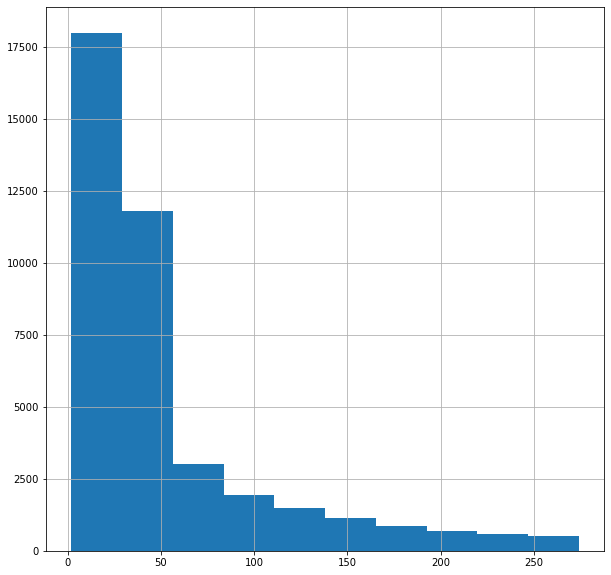

In [2700]:
df['Number of Reviews'].hist()
df['Number of Reviews'].describe()

Данные распределены нормально

### Еще раз посмотрим на данные

In [2701]:
df.sample(3)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Vegetarian Friendly,Fast Food,European,Mediterranean,Italian,Vegan Options,Gluten Free Options,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,British,International,Seafood,Japanese,Central European,American,Cuisine Rare,Last_Review,First_Review,Days_Between_Reviews,Positive_Revies,Negative_Revies
29968,id_1331,Dublin,"['Cafe', 'Vegetarian Friendly']",1334.0,4.0,2,33.0,"[['Homely Coffee House cafe....', 'Very good b...",the_roastery_cafe,d6965386,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2017-11-21,2017-04-20,215.0,1,0
2627,id_1634,Edinburgh,"['Italian', 'American', 'Gluten Free Options']",1640.0,3.0,2,149.0,"[['After cinema meal', 'Slow slow service at l...",frankie_benny_s_fort_kinnaird,d7270068,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2017-11-25,2017-11-18,7.0,0,0
15101,id_9051,London,"['Caribbean', 'Cafe']",9060.0,5.0,2,52.0,"[['Super good food'], ['08/05/2017']]",uptown_cafe,d7278610,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2017-08-05,2018-02-26,205.0,1,0


### City

In [2702]:
df['City'].unique()

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

Изменим значение Oporto на Porto

In [2703]:
df.loc[df['City'] == 'Oporto', 'City'] = 'Porto'

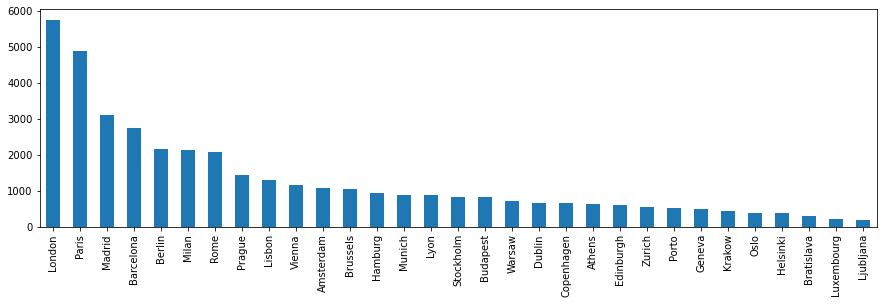

In [2704]:
plt.figure(figsize=(15, 4))
df['City'].value_counts(ascending=False).plot(kind='bar')

Создадим список городов и найдем в добавленом датасете эти города.

In [2705]:
#df['Ranked_Cities'] = df['City'].rank()

Создадим признак количества отзывов по городам.

In [2706]:
rewiews_city_dict = dict(df.groupby('City')['Number of Reviews'].sum())
df['Rewiews_by_City'] = df.City.map(rewiews_city_dict)

Создадим признак отношения рейтинга в городе к количеству отзывов в городе.

In [2707]:
df['Relative_Rank_Reviews'] = df['Ranking'] / df['Rewiews_by_City']

Создадим признак ценовых категорий по городам.

In [2708]:
price_range_city_dict = dict(df.groupby('City')['Price Range'].mean())
df['Price_Range_by_City'] = df['City'].map(price_range_city_dict)

Создадим признак отношения рейтинга в городе к ценовой категории в городе.

In [2709]:
df['Relative_Price_Range'] = df['Ranking'] / df['Price_Range_by_City']

Создадим признак количества дней между отзывами по городам.

In [2710]:
days_city_dict = dict(df.groupby('City')['Days_Between_Reviews'].sum())
df['Days_Between_Reviews_by_City'] = df['City'].map(days_city_dict)

Создадим признак отношения рейтинга в городе к количеству дней между отзывами по городам.

In [2711]:
df['Relative_Days_Between_Reviews_Range'] = df['Ranking'] / df['Days_Between_Reviews_by_City']

Создадим признак количества кухонь по городам.

In [2712]:
cuisines_city_dict = dict(df.groupby('City')[cuisine_columns].sum().sum(axis=1))
df['Cuisines_by_City'] = df['City'].map(cuisines_city_dict)

Создадим признак отношения рейтинга в городе к количеству кухонь по городам.

In [2713]:
df['Relative_Cuisines_Range_by_City'] = df['Ranking'] / df['Cuisines_by_City']

### Корреляция признаков

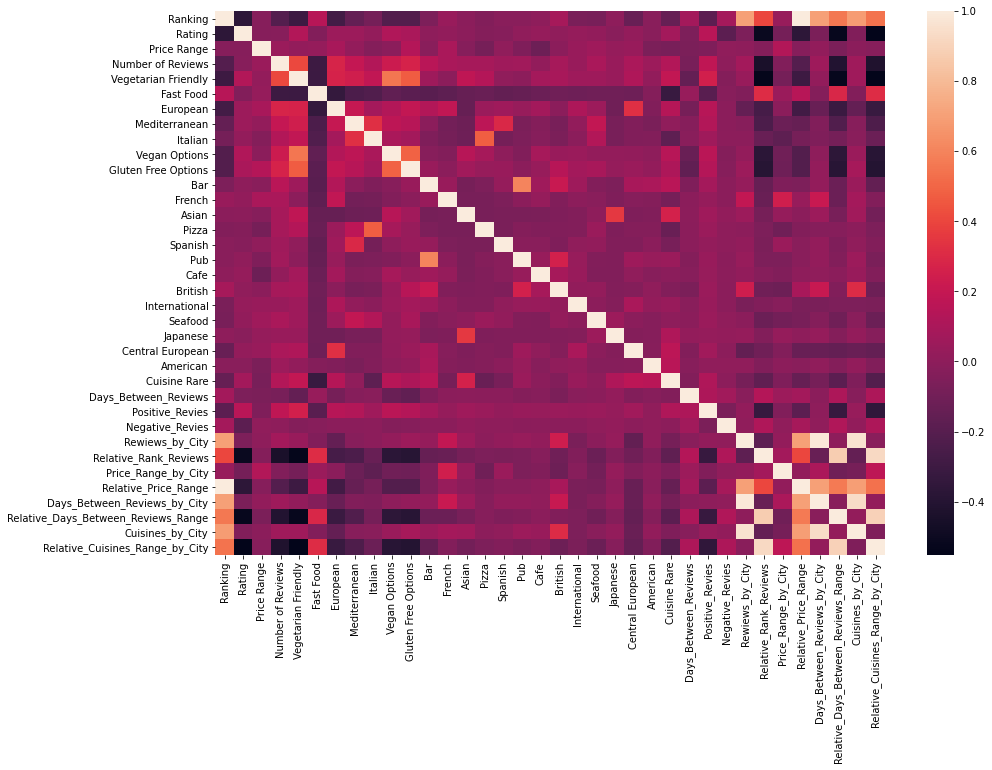

In [2714]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.corr())

Удалим лишние признаки

In [2715]:
df.drop(['City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA',
         'ID_TA', 'Last_Review', 'First_Review'], axis='columns', inplace=True)

In [2716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Restaurant_id                        40000 non-null  object 
 1   Ranking                              40000 non-null  float64
 2   Rating                               40000 non-null  float64
 3   Number of Reviews                    40000 non-null  float64
 4   Vegetarian Friendly                  40000 non-null  int64  
 5   Fast Food                            40000 non-null  int64  
 6   European                             40000 non-null  int64  
 7   Mediterranean                        40000 non-null  int64  
 8   Italian                              40000 non-null  int64  
 9   Vegan Options                        40000 non-null  int64  
 10  Gluten Free Options                  40000 non-null  int64  
 11  Bar                         

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [2717]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis=1)
y = df['Rating']

In [2718]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [2719]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

# Создаём, обучаем и тестируем модель

In [2720]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

In [2721]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [2722]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21254650000000003


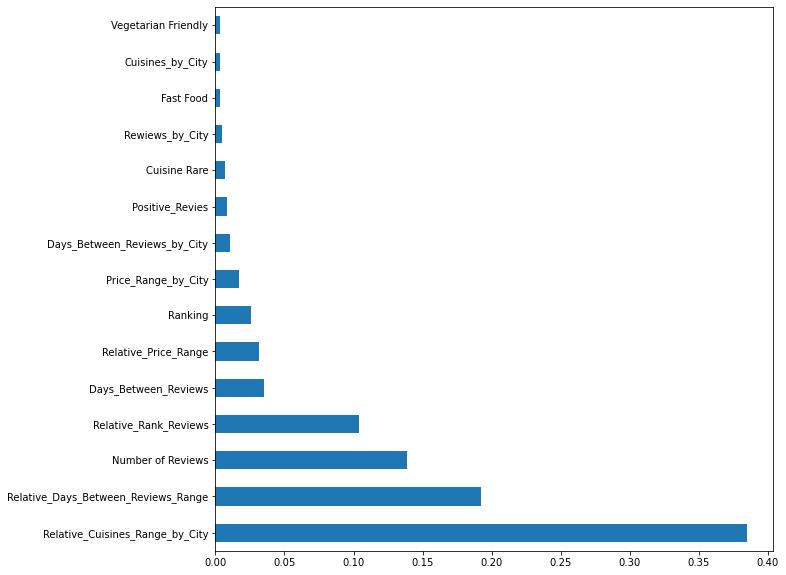

In [2723]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')



## Выводы

В результате мы видим, что наибольшее влияние на среднее отклонение предсказанных значений имеют относительные признаки связанные с рангом  ресторанов, что в принципе понятно.
Из тепловой диаграммы корреляции признаков видно, что ранг и рейтинг находятся в прямой зависимости.

Использование данных по видам кухонь не оказало на прямую никакого влияния на рейтинг.
А вот их количество на уровне города оказывает наибольшее влиание.

Я отказался от попытки даммировать города, т.к. не вижу в этом логики. По видимому необходимо добавлять дополнительные данные по городам, что бы это хоть как-то повлияло на рейтинг.

Так же сильное влияние на рейтинг оказывают количество отзывов и количество дней между отзывами.

По видимому, что да могло помочь в предсказании рейтинга, это количество положительный и отрицательный отзывов.
Но в связи с очень незначительным количеством самих отзывов в колонке Reviews и, соответсвенно близким результатом в указанных колонках, значение этих наиважнейших признаков ослабленно.
Т.е. для более точтного рассчета рейтинга необходим более полный список отзывов.